In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os
import time
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

#Pandas setting for better visualization of dataframe.
pd.options.display.float_format='{:.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 

In [2]:
taylor=pd.read_csv("spotify_taylorswift.csv",index_col=0)
taylor.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.58,0.57,0.49,0.00,0.12,-6.46,0.03,0.42,76.01
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.66,0.17,0.88,0.00,0.10,-2.10,0.03,0.82,105.59
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.62,0.29,0.42,0.00,0.12,-6.94,0.02,0.29,99.95
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.58,0.05,0.78,0.00,0.32,-2.88,0.03,0.43,115.03
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.42,0.22,0.48,0.00,0.12,-5.77,0.03,0.26,175.56


In [3]:
taylor.shape

(171, 15)

In [4]:
taylor.size

2565

In [5]:
taylor.dtypes

name                object 
album               object 
artist              object 
release_date        object 
length              int64  
popularity          int64  
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

In [6]:
taylor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              171 non-null    object 
 1   album             171 non-null    object 
 2   artist            171 non-null    object 
 3   release_date      171 non-null    object 
 4   length            171 non-null    int64  
 5   popularity        171 non-null    int64  
 6   danceability      171 non-null    float64
 7   acousticness      171 non-null    float64
 8   energy            171 non-null    float64
 9   instrumentalness  171 non-null    float64
 10  liveness          171 non-null    float64
 11  loudness          171 non-null    float64
 12  speechiness       171 non-null    float64
 13  valence           171 non-null    float64
 14  tempo             171 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 21.4+ KB


In [7]:
taylor.describe().T

,count,mean,std,min,25%,50%,75%,max
length,171.00,236663.52,40456.72,107133.00,211833.00,234000.00,254447.00,403887.00
popularity,171.00,61.23,11.90,0.00,58.00,63.00,67.00,82.00
danceability,171.00,0.59,0.12,0.29,0.53,0.59,0.66,0.90
acousticness,171.00,0.32,0.33,0.00,0.03,0.16,0.67,0.97
energy,171.00,0.59,0.19,0.12,0.46,0.61,0.73,0.94
instrumentalness,171.00,0.00,0.02,0.00,0.00,0.00,0.00,0.18
liveness,171.00,0.15,0.09,0.03,0.09,0.12,0.17,0.66
loudness,171.00,-7.32,2.88,-17.93,-8.86,-6.70,-5.34,-2.10
speechiness,171.00,0.07,0.11,0.02,0.03,0.04,0.06,0.91
valence,171.00,0.42,0.19,0.05,0.28,0.42,0.55,0.94


In [8]:
taylor.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo'],
      dtype='object')

The dataset consists of 14 features and 1 dependant variable which is popularity. There are no null values in this dataset also. 

### dataset overview

In [9]:
taylor.select_dtypes(include=object).nunique()

name            169
album           9  
artist          1  
release_date    9  
dtype: int64

The artist feature only have 1 unique value. We can drop this feature later because it doesn't give us any valueable information. We already know that this dataset of Taylor Swift's song. The album and release_date feature is redundant. We know that there are no album released on same date. Therefore we only need 1 of those features. The release_date will be dropped later.

In [10]:
taylor.select_dtypes(exclude=object).describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,236663.52,61.23,0.59,0.32,0.59,0.00,0.15,-7.32,0.07,0.42,124.14
std,40456.72,11.90,0.12,0.33,0.19,0.02,0.09,2.88,0.11,0.19,31.48
min,107133.00,0.00,0.29,0.00,0.12,0.00,0.03,-17.93,0.02,0.05,68.53
25%,211833.00,58.00,0.53,0.03,0.46,0.00,0.09,-8.86,0.03,0.28,96.05
50%,234000.00,63.00,0.59,0.16,0.61,0.00,0.12,-6.70,0.04,0.42,121.96
75%,254447.00,67.00,0.66,0.67,0.73,0.00,0.17,-5.34,0.06,0.55,146.04
max,403887.00,82.00,0.90,0.97,0.94,0.18,0.66,-2.10,0.91,0.94,207.48


The numerical features is shown above. The 25% quantile, median, and 75% quantile is zero. We can drop instrumentalness feature because it doesn't give much information.

### datacleaning

In [11]:
taylor=taylor.drop(['name','artist','release_date','instrumentalness'],axis=1)
taylor

,album,length,popularity,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo
0,Taylor Swift,232106,49,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01
1,Taylor Swift,173066,54,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59
2,Taylor Swift,203040,59,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95
3,Taylor Swift,199200,49,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03
4,Taylor Swift,239013,50,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56
...,...,...,...,...,...,...,...,...,...,...,...
166,Fearless (Taylor's Version),277591,74,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94
167,Fearless (Taylor's Version),244236,65,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01
168,Fearless (Taylor's Version),189495,67,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20
169,Fearless (Taylor's Version),208608,66,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93


We dropped name, artist, release_date, and instrumentalness. We reduced the feature into 10 with 1 dependant variable.

In [12]:
taylor.shape

(171, 11)

In [13]:
taylor.columns

Index(['album', 'length', 'popularity', 'danceability', 'acousticness',
       'energy', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo'],
      dtype='object')

In [14]:
popularity=taylor['popularity']
taylor=taylor.drop('popularity',axis=1)
taylor.insert(loc=len(taylor.columns), column='popularity', value=popularity)
taylor

,album,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,Taylor Swift,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,Taylor Swift,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,Taylor Swift,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,Taylor Swift,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,Taylor Swift,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...,...
166,Fearless (Taylor's Version),277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
167,Fearless (Taylor's Version),244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
168,Fearless (Taylor's Version),189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
169,Fearless (Taylor's Version),208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


By moving the popularity column, our dataset is cleaned. We have dependant variable on the rightmost column of this dataset.

## DATA ANALYSIS

### 1.popularity analysis

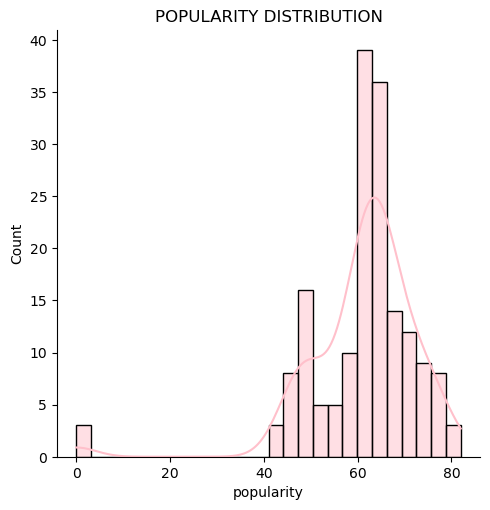

In [16]:
sns.displot(x='popularity',data=taylor,kde=True,color='pink')
plt.title('POPULARITY DISTRIBUTION')
plt.show()

By plotting the distribution of popularity, we see that the data can be distributed normally if the lowest data on the left side dropped.

In [22]:
taylor=taylor.drop(taylor.loc[taylor['popularity']<=20].index)
taylor

,album,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,Taylor Swift,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,Taylor Swift,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,Taylor Swift,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,Taylor Swift,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,Taylor Swift,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...,...
163,Fearless (Taylor's Version),277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
164,Fearless (Taylor's Version),244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
165,Fearless (Taylor's Version),189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
166,Fearless (Taylor's Version),208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


We dropped 2 data from the dataset with lowest popularity.

Text(0.5, 1.0, 'Popularity Distribution\n(After Deletion)')

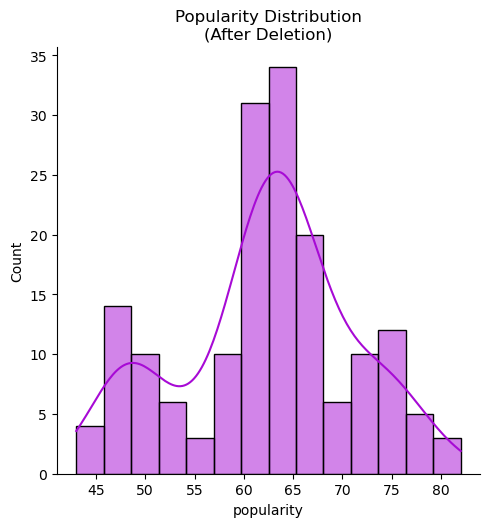

In [23]:
sns.displot(x='popularity', data=taylor, kde=True, color='#a70ad5')
plt.title('Popularity Distribution\n(After Deletion)')

In [31]:
from scipy.stats import skew
print(skew(taylor['popularity'],bias=False))

-0.24360906678672503


After dropping 2 data with lowest popularity, we have nearly normal distribution of popularity, with a bit left-skewed.

### 2 Album vs. Popularity Analysis

Text(0.5, 1.0, 'Album vs Popularity')

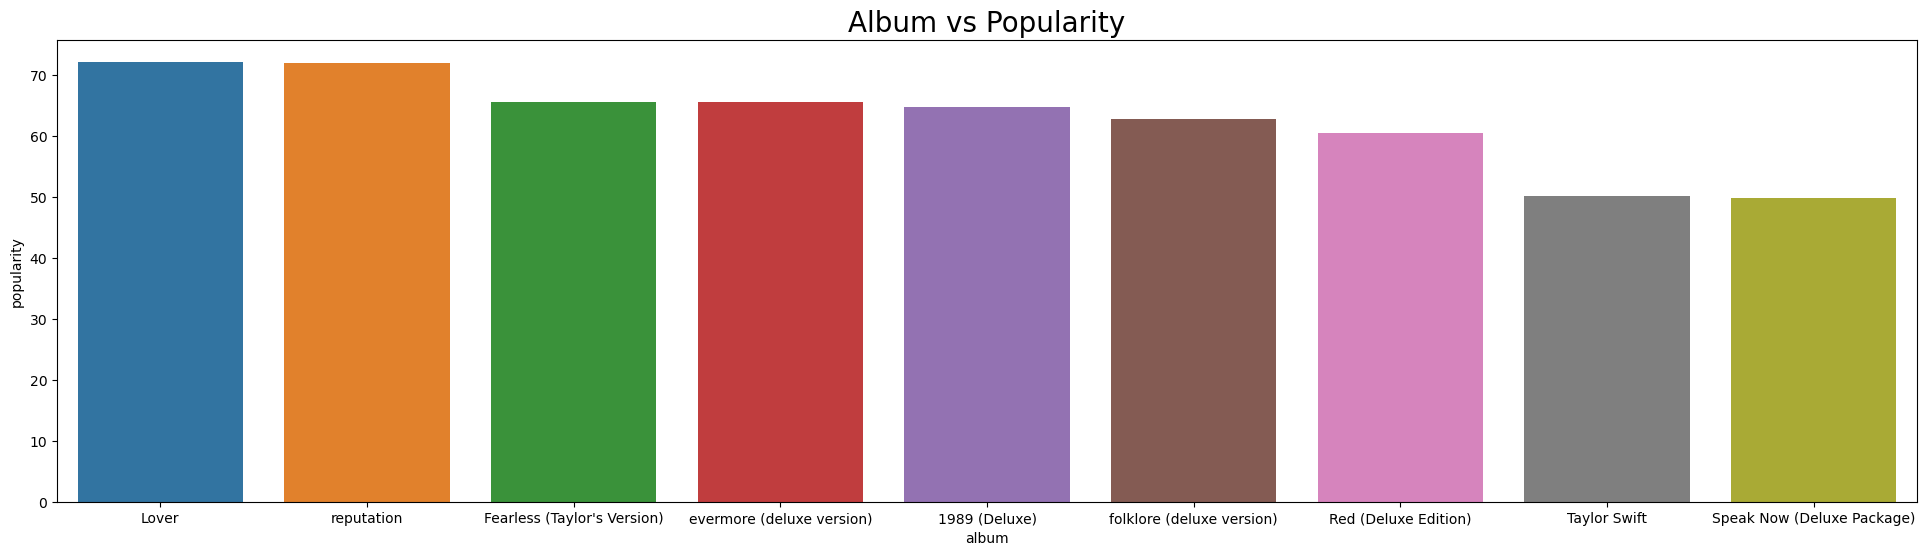

In [32]:
#creating dummy dataset to sort the data. It is to see which album is having most popularity.
apa = taylor.groupby('album').mean().sort_values(['popularity'],ascending=False)
apa = apa.reset_index()

plt.figure(figsize=(24, 6))
sns.barplot(x='album', y='popularity', data=apa)
plt.title('Album vs Popularity', fontsize=20)

From above chart, 3 highest popularity of Taylor's songs are Lover, Reputation, and Fearless.

### 3 Features Correlation

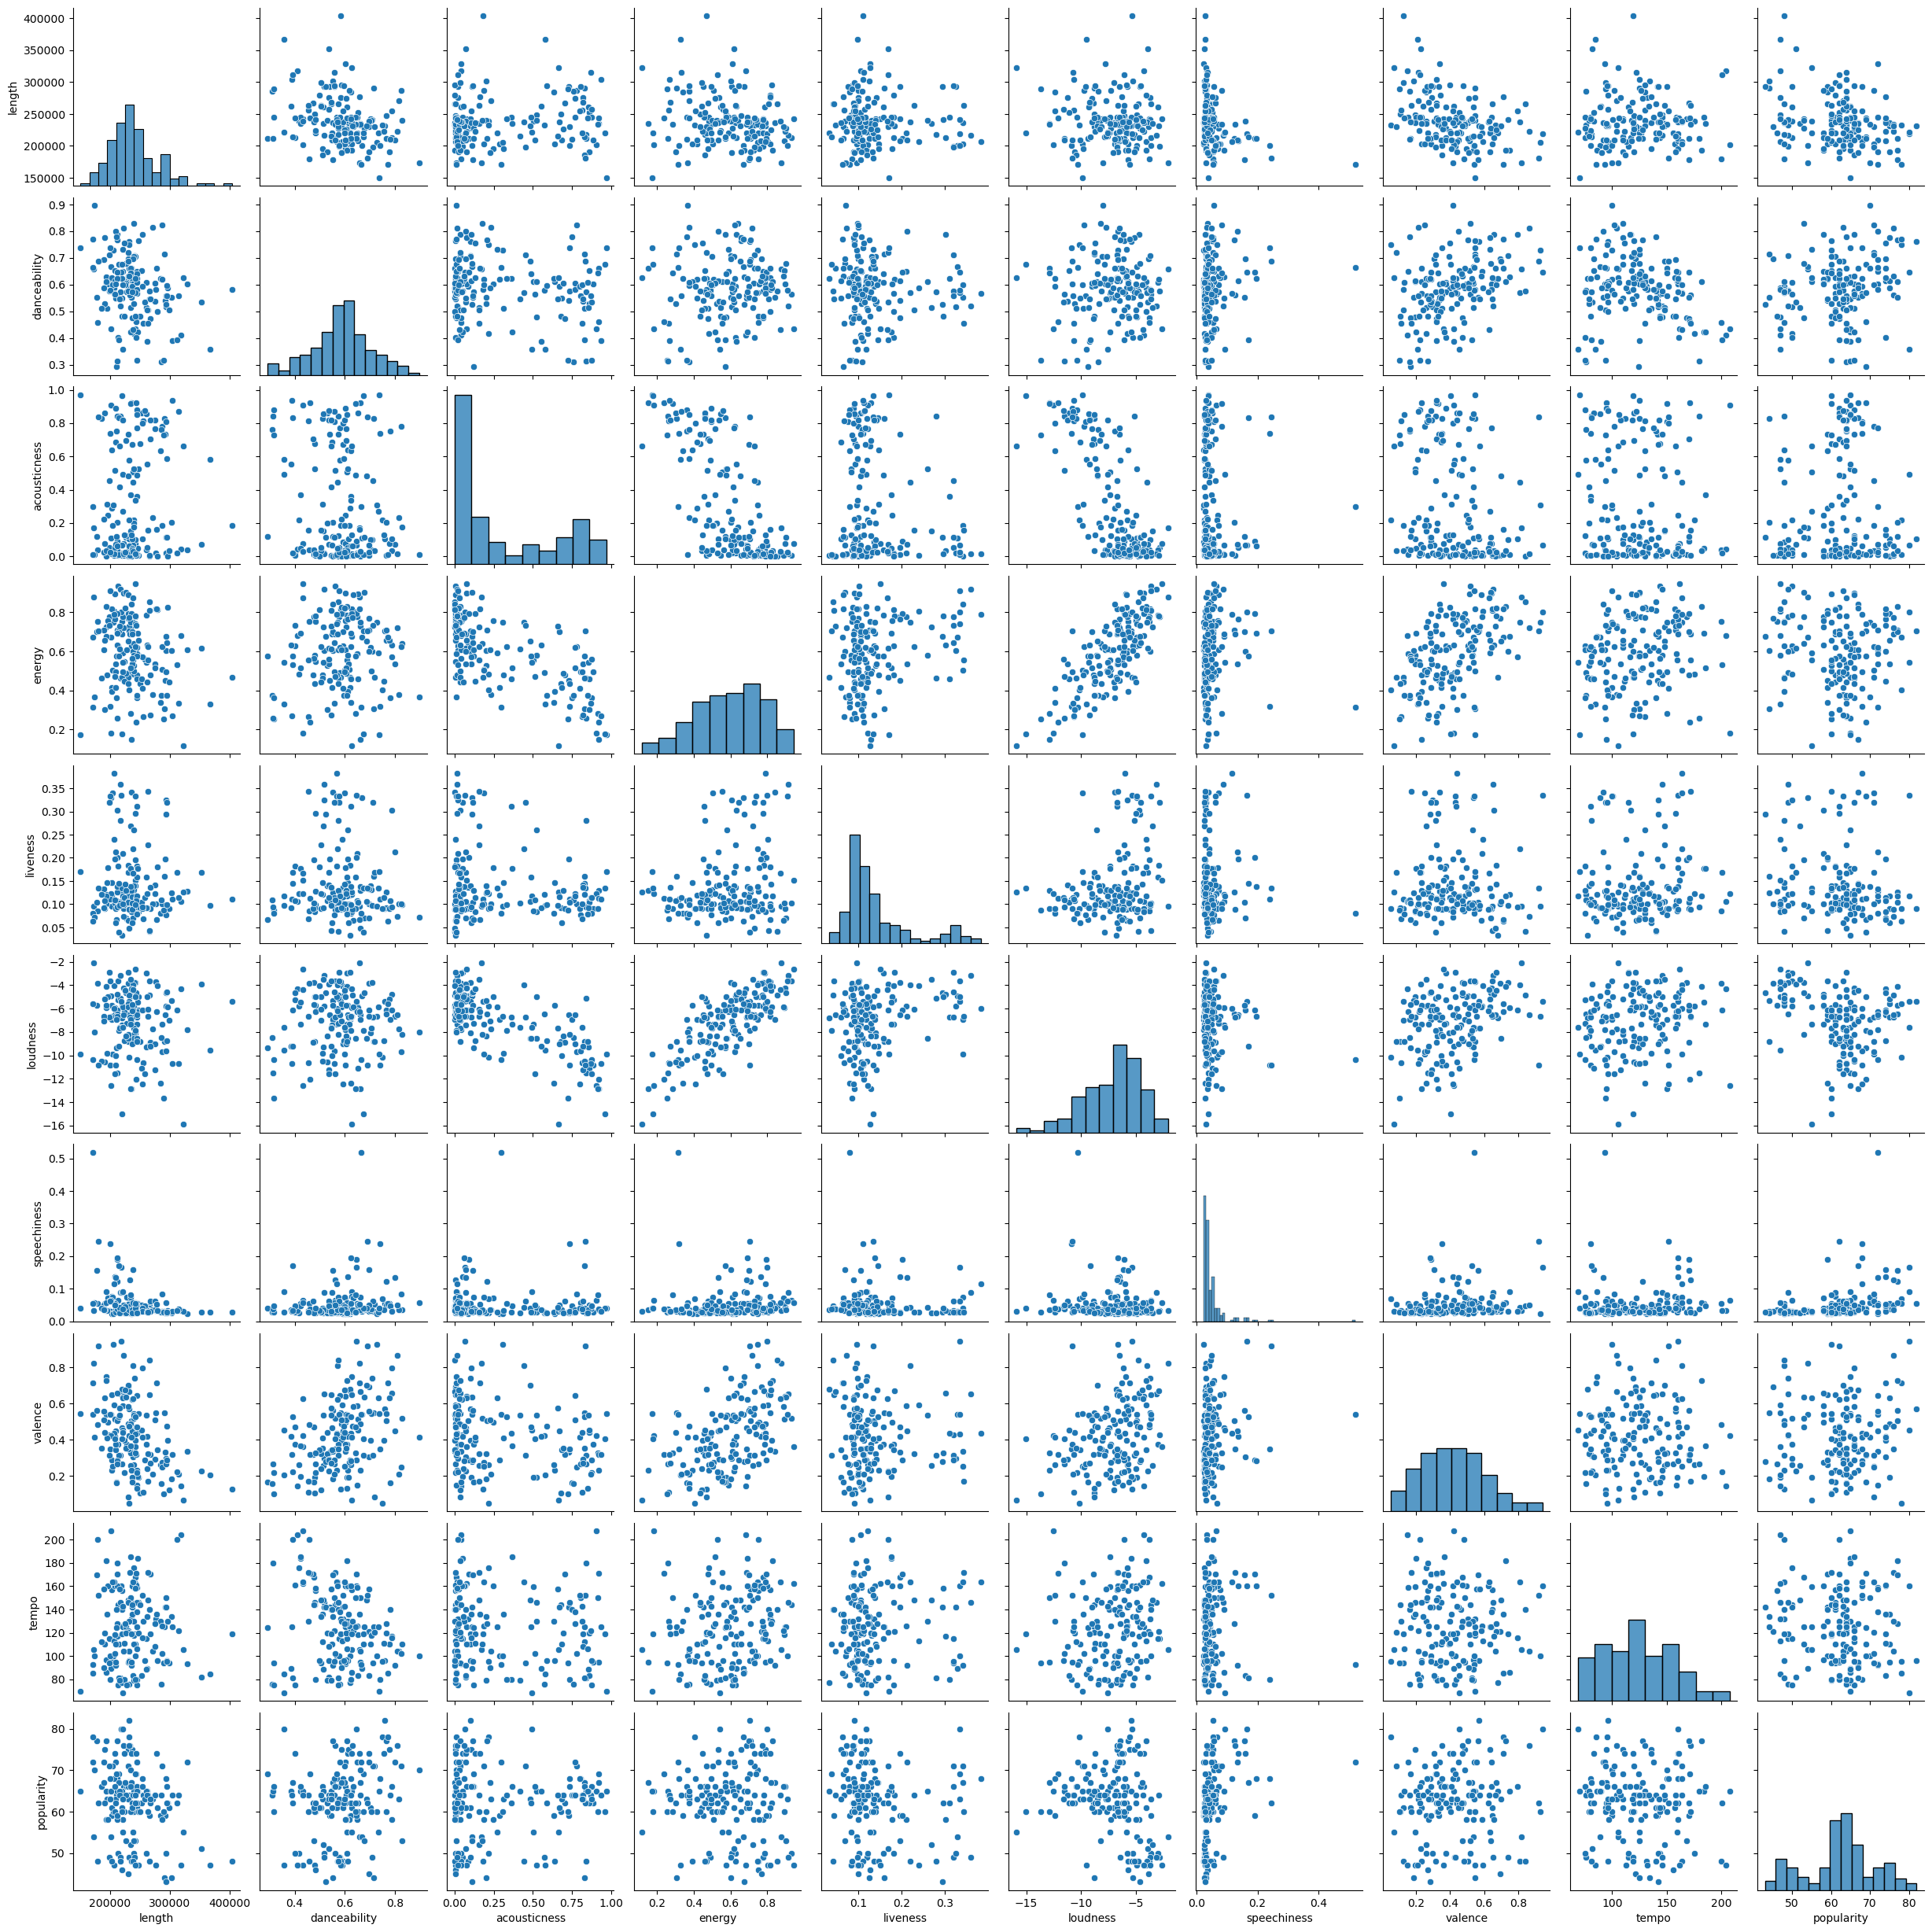

In [33]:
sns.pairplot(taylor)

The pairplot of every numerical features shown that no linear correlation of popularity and other features.

<Axes: >

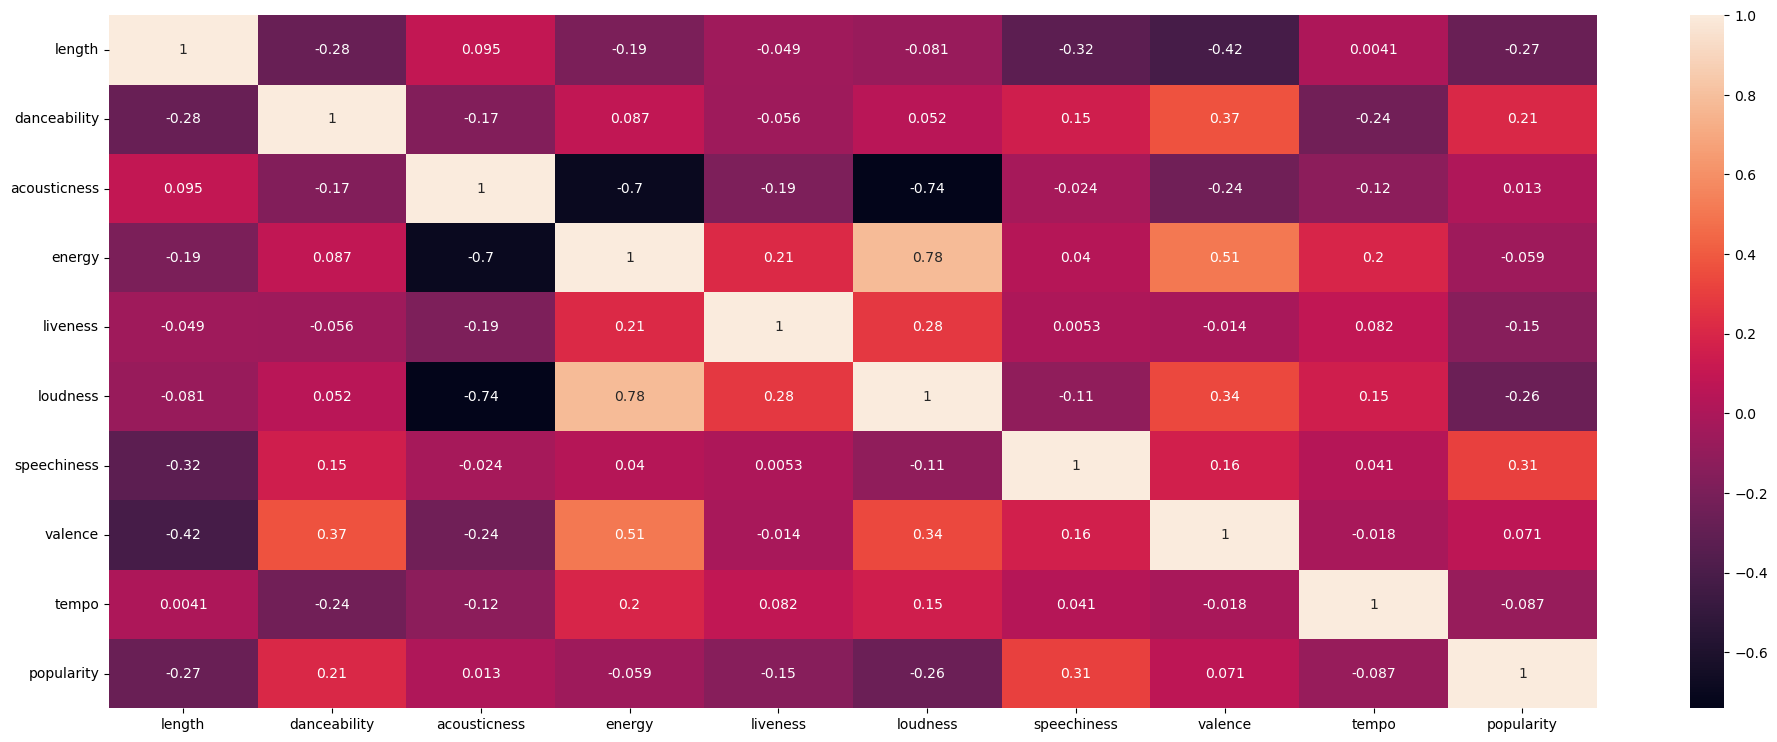

In [35]:
corr = taylor.corr()
plt.figure(figsize=(24, 9))
sns.heatmap(corr, annot=True)

Correlation heatmap also not showing high-correlation of popularity with other features. We can see below high-correlation :

-acousticness negatively correlated to energy
-acousticness negatively correlated to loudness
-energy positively correlated to loudness

### .3.1 Energy vs Acousticness

Text(0.5, 1.0, 'Acousticness vs Energy')

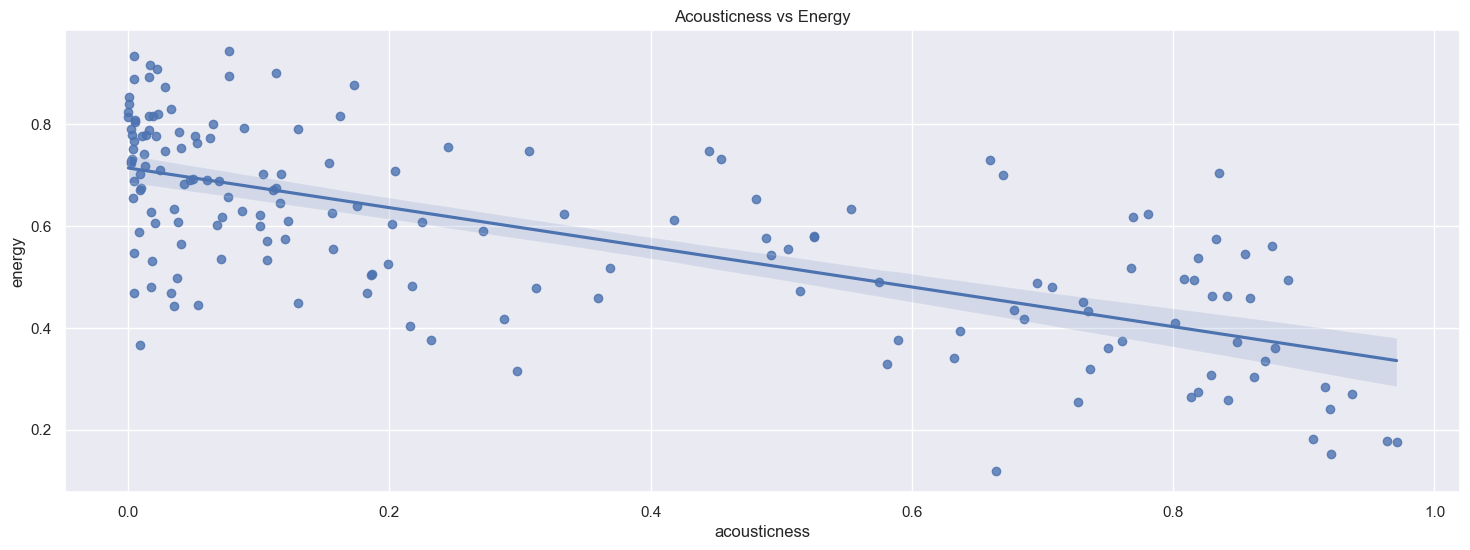

In [36]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='acousticness', y='energy', data=taylor)
plt.title('Acousticness vs Energy')

With Regplot, we can see the negative correlation of acousticness and energy. Songs with higher level of acousticness tend to have lower energy.

### 3.2 Acusticness vs Loudness

Text(0.5, 1.0, 'Acousticness vs Loudness')

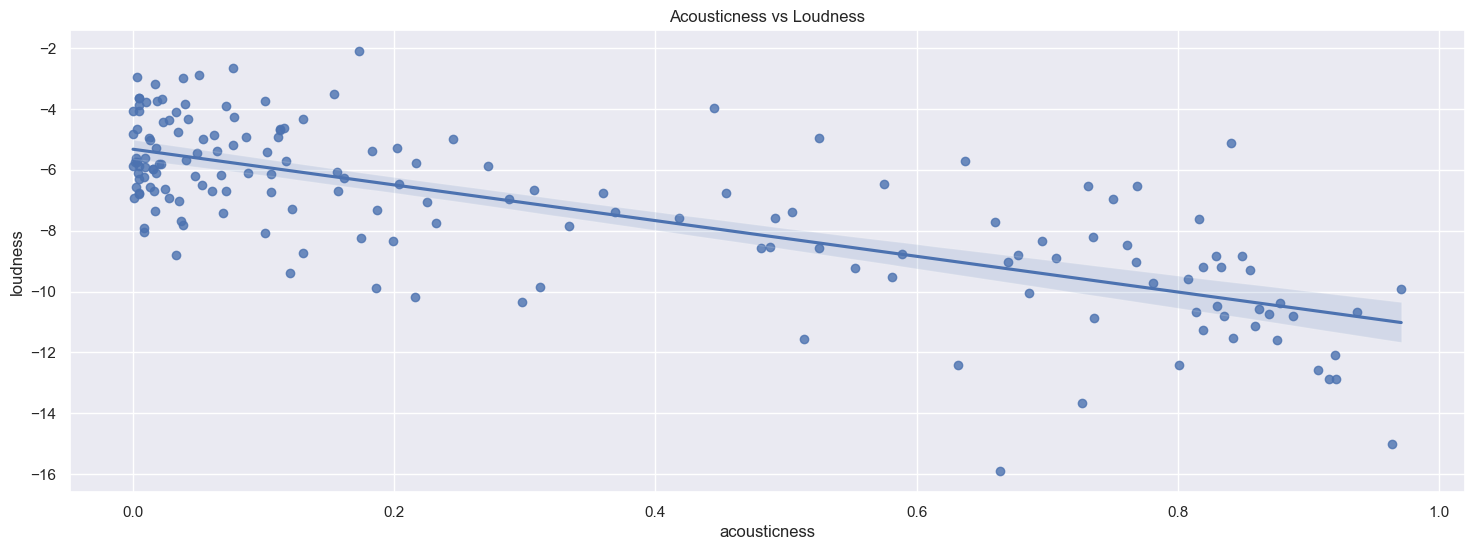

In [37]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='acousticness', y='loudness', data=taylor)
plt.title('Acousticness vs Loudness')

We can see the negative correlation. Song with high acousticness level tend to have lower loudness.

### 3.3 Energy vs Loudness

Text(0.5, 1.0, 'Energy vs Loudness')

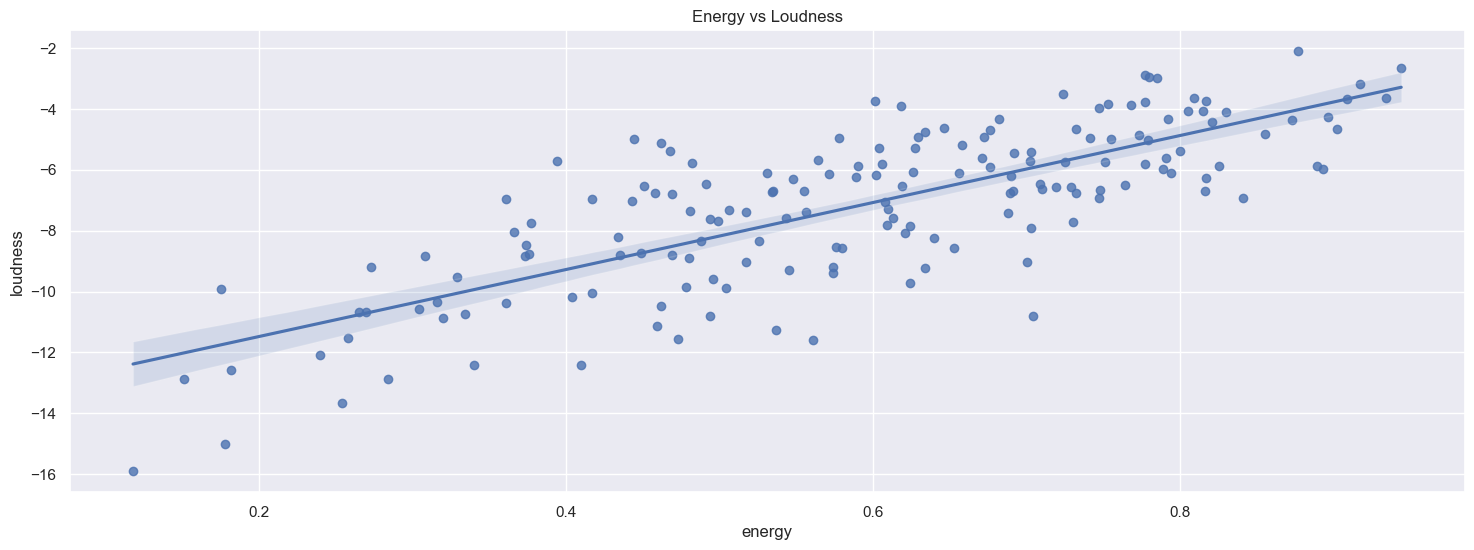

In [38]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='energy', y='loudness', data=taylor)
plt.title('Energy vs Loudness')

The above chart is clearer than the other two. We can see positive correlation of energy and loudness. Song with higher energy tend to have higher loudness.

In [39]:
taylor.columns

Index(['album', 'length', 'danceability', 'acousticness', 'energy', 'liveness',
       'loudness', 'speechiness', 'valence', 'tempo', 'popularity'],
      dtype='object')